In [17]:
import csv
import matplotlib.pyplot as plt
from datetime import datetime

In [18]:
# [Order Date, Order no., Name, Classification, ?, ?, Ordered From, ?, Condition, Seller, ?, Paid, List Price, ...]
with open('201806.csv') as f:
    reader = csv.reader(f)
    info = [[row[0],row[2],row[3],row[12]] for row in reader]

In [ ]:
for i in info:
    print(i)

Average order price: 24.958242424242354


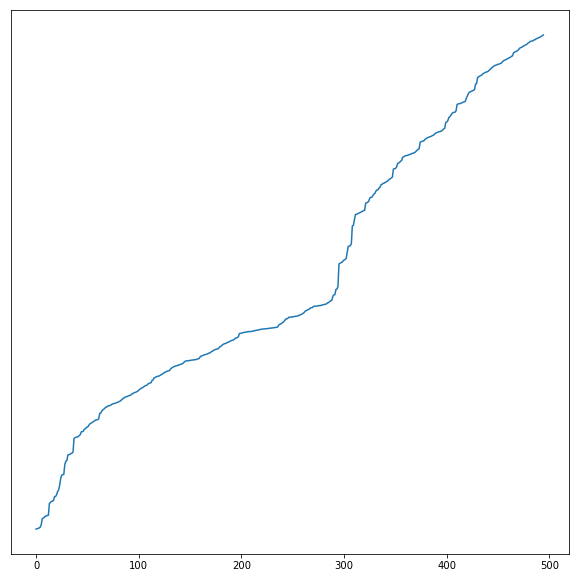

In [20]:
prices = [float(x[3][1:]) for x in info[1:]]
sum_prices = 0
sum_terms = [0]*len(prices)
for i,x in enumerate(prices):
    sum_prices += x
    sum_terms[i] = sum_prices
#print('Total spent: ' + str(sum_prices))
print('Average order price: ' + str(sum_prices/len(prices)))
plt.rcParams['figure.figsize'] = (10,10)
plt.plot(sum_terms)
# Don't show y axis for privacy reasons
frame = plt.gca()
frame.axes.get_yaxis().set_ticks([])
plt.show()

# Now try and do it by date to get better context

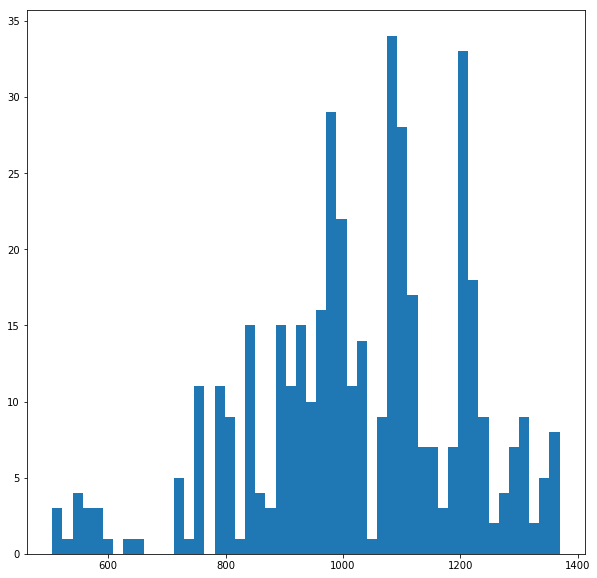

In [21]:
def mdy_to_day(date,starting):
    # if fed in 09/08/17 as date and 12/14/14 as start, will compute difference in days from start to date
    # thanks datetime library!
    d1 = datetime.strptime(starting, "%m/%d/%Y")
    d2 = datetime.strptime(date, "%m/%d/%Y")
    return abs((d2 - d1).days)

starting = '09/18/2014'
if isinstance(info[1][0],str):
    for i in range(1,len(info)):
        info[i][0] = mdy_to_day(info[i][0][:6] + '20' + info[i][0][-2:],starting)

plt.rcParams['figure.figsize'] = (10,10)
plt.hist([x[0] for x in info[1:] if x[0] > 500],50)
plt.show()

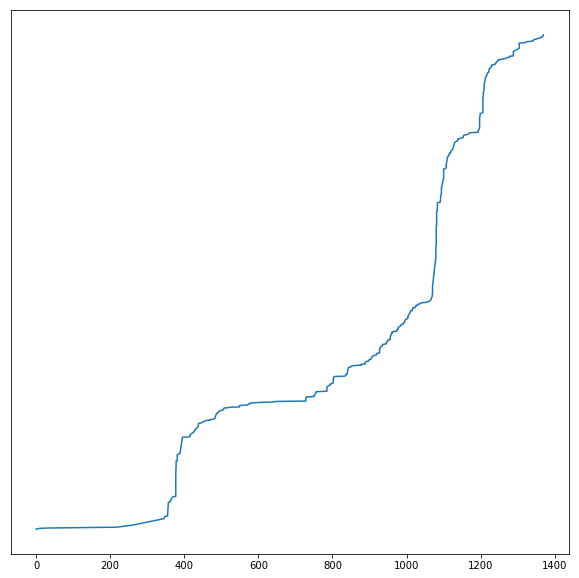

In [22]:
### Actual amount of spending on Amazon
plt.plot([x[0] for x in info[1:]],sum_terms)
# Don't show y axis for privacy reasons
frame = plt.gca()
frame.axes.get_yaxis().set_ticks([])
plt.savefig('amazon_purchase_frequency.png')
plt.show()